## Dependencies

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
## In openCV
# images are BGR
# Locations are y,x

## Reading an image

In [43]:
img = cv2.imread('images/my_self.jpg',1) # 0 for gray scale
                                         # 1 for colors (default)
    
print(img.shape)
print(img.size)  # how many pixels
# img

(2048, 2035, 3)
12503040


## Image Saving and Showing

### Showing in a seperate screen (cv2.imshow)

In [3]:
cv2.imshow('first image', img)   # image screen title, img

# k = cs2.waitKey(5000) --> This will wait for 5 seconds to destroy the image
# v2.destroyAllWindows()

k = cv2.waitKey(0)   # --> This line should be wirtten to avoid crashing in jupyter
if k == 27:          # --> if we press ESC (27) the image screen closes
    cv2.destroyAllWindows()
    
elif k == ord('s'):  # --> if we press (s), the image will be saved
    cv2.imwrite('sec image.jpg',img)   # --> To save the image with new name
    cv2.destroyAllWindows() 

### Showing the image in jupyter notebook (plt.imshow)

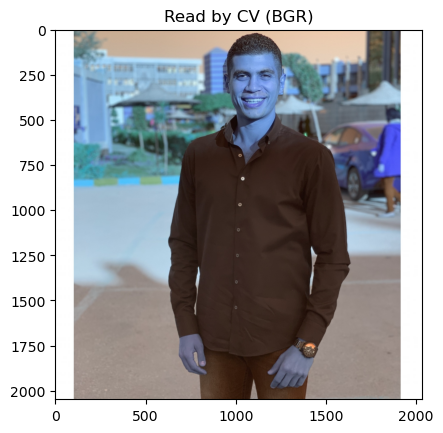

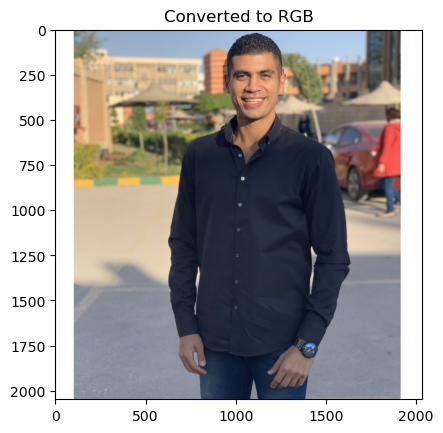

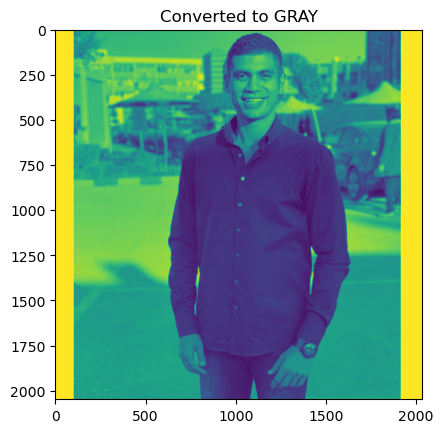

In [4]:
plt.imshow(img)
plt.title("Read by CV (BGR)")
plt.show()
# OpenCv reads the image in BGR not in RGB

# Converting to RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.title("Converted to RGB")
plt.show()

# Converting to Gray
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img3)
plt.title("Converted to GRAY")
plt.show()


## Reading a Video and Save it

In [3]:
cap = cv2.VideoCapture(0) # 0 for laptop camera
                          # 'video.mp4' for a local video
    
# print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  640
# print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  480 defult size

# to control size of video
cap.set(3, 720)  # Width
cap.set(4, 720)  # Height
print("Width: ", cap.get(3), " and Height: ", cap.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # This line to make better resolution

# Saving the video
# VideoWriter(video_name, fourcc, fps, resolution)
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640,480))
out_gray = cv2.VideoWriter('output_gray.avi', fourcc, 20.0, (640,480), 0) # we add param 0 if grayscale

print(cap.isOpened())   # True or false to check everything is right

while(cap.isOpened()):
    ret, frame = cap.read()  # reading the cap
    if ret == True:
        
        
        # to save video
        out.write(frame) # saving the frame in out
        
        # To save it in grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out_gray.write(gray)
        
        cv2.imshow('frame', gray)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press q to close !!
            cv2.destroyAllWindows()
            break
        
    else: break
        
cap.release()
out.release()
out_gray.release()

Width:  640.0  and Height:  480.0
True


## Drawing a Shape/Text on an Image


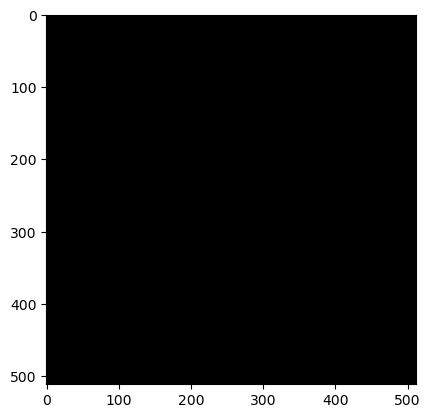

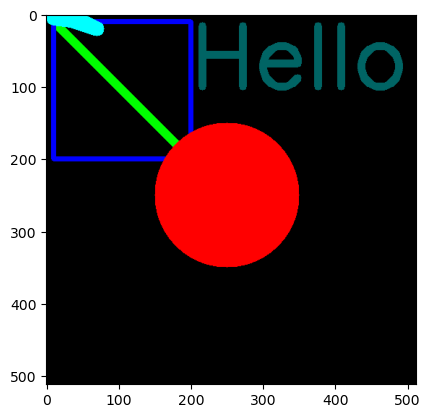

In [36]:
# img = cv2.imread('images/my_self.jpg')
img = np.zeros([512,512,3], np.uint8)    # uint8 (from 0 to 255)
plt.imshow(img)
plt.show()

# Drawing a shape
# 1- line: (img, start, end, color, thickness)   if thickness=1 -> Fill
# 2- arrowedLine
# 3- rectangle
# 4- circle (img, center, radius, color, thickness)
img = cv2.line(img, (0,0), (300,300), (0,255,0), 10)
img = cv2.rectangle(img, (10,10), (200,200), (0,0,255), 5)
img = cv2.circle(img, (250,250), 100, (255,0,0), -1)

# Drawing a Polygon shape
pts = np.array([[10,5],[20,3],[70,20],[50,10]], np.int32)
img = cv2.polylines(img, [pts], True, (0,255,255), 20)

# Putting a Text
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'Hello', (200,100), font, 4, (0,100,100), 10)

plt.imshow(img)
plt.show()

## !!Case Study 1 (Writing Time on Video Captured)

In [19]:
from datetime import datetime
# Reading the video
cap = cv2.VideoCapture(0)
cap.set(3, 720)
cap.set(4, 720)
font = cv2.FONT_HERSHEY_SIMPLEX

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        text1 = 'Time Now:' + str(datetime.now())
        text2 = 'Width: ' + str(cap.get(3)) + ' Height: ' + str(cap.get(4))
        
        frame = cv2.putText(frame, text1, (10,50), font, 0.5, (255,255,0), 2)
        frame = cv2.putText(frame, text2, (10,150), font, 1, (255,255,0), 2)
        
        # Show Frame
        cv2.imshow('Hello', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press q to close !!
            cv2.destroyAllWindows()
            break
        
    else: break

cap.release()

        

## Events in CV2

In [20]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

#### To create an Mouse Event
# def click_event(event, x, y, flags, param): ---> 5 parameters
# x,y --> LOCATION of event happened
# event --> Type of event


#### cv2.setMouseCallback('image', click_event)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


### !!Case Study 2 (Left Button: x,y & Right Button: RGB) new_img


In [38]:
# We will use (EVENT_LBUTTONDOWN , EVENT_RBUTTONDOWN)
def click_event(event, x, y, flags, params):
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if event == cv2.EVENT_LBUTTONDOWN:
        strXY = str(x) + ',' + str(y)
        new_img = img.copy()  # To put text in a new image and not concatenate
        cv2.putText(new_img, strXY, (x,y), font, 0.5, (255,255,0), 2)
        cv2.imshow('image', new_img)
        
    if event == cv2.EVENT_RBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]
        red = img[y,x,2]
        strBGR = str(blue) + ',' + str(green) + ',' + str(red)
        new_img = img.copy() # To put text in a new image and not concatenate
        cv2.putText(new_img, strBGR, (x,y), font, 0.5, (255,255,0), 2)
        cv2.imshow('image', new_img)
        
img = cv2.imread('images/apple1.jpg')
cv2.imshow('image', img)

# Setting the event
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()

### !!Case Study 3 (Drawing a Line using Left Button and a Circle RightButton)

In [39]:
def click_event(event , x, y, flags, params):
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    if event == cv2.EVENT_LBUTTONDOWN:  #Pressing button
        points.append((x,y))
        
    elif event == cv2.EVENT_LBUTTONUP: # Leaving button
        points.append((x,y))
        if len(points) >= 2:
            cv2.line(img, points[-1], points[-2], (255,0,0),5)
        cv2.imshow('image', img)
        
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x,y), 10, (255,255,0), -1)
        cv2.imshow('image', img)
        
img = np.zeros((512,512,3), np.uint8)
cv2.imshow('image', img)
points = []

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

### !!Case Study4 (Getting the RGB of pressed in a new window)

In [42]:
def click_event(event,x,y,flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        blue = img[y,x,0]
        green = img[y,x,1]        
        red = img[y,x,2]
        
        myColorImage = np.zeros((512,512,3), np.uint8)
        myColorImage[:] = [blue, green, red]
        
        cv2.imshow('color', myColorImage)
        
img = cv2.imread('images/apple1.jpg')
cv2.imshow('image',img)

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()

## CV Methods (ROI, Merge, Split, Resize, Add, addWeighted)

### split and merge

(2048, 2035, 3)


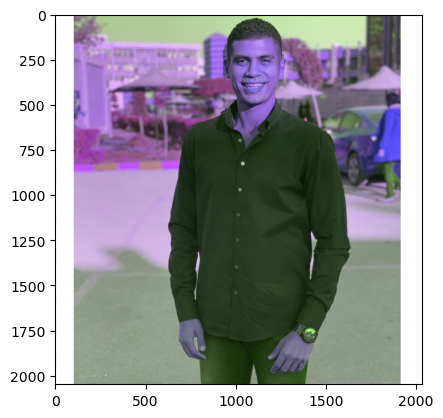

In [59]:
img = cv2.imread('images/my_self.jpg')

# Split: to split b g r 
b,g,r = cv2.split(img)

# Merge: merge b g r
img = cv2.merge((g,b,r))
print(img.shape)


plt.imshow(img)
plt.show()


### ROI (Crop image and place it in another location)

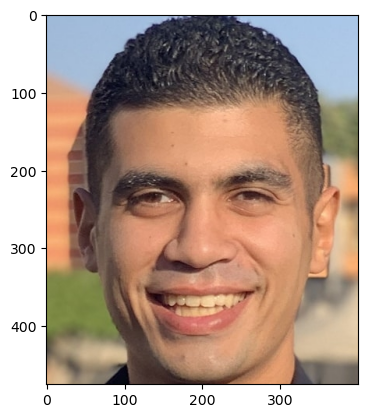

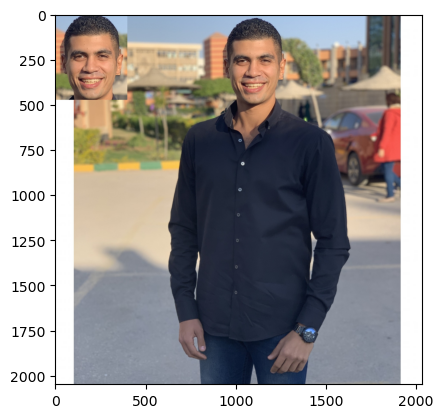

In [69]:
img = cv2.imread('images/my_self.jpg')

# Cropping Image
head = img[25:500, 900:1300]
head_rgb = cv2.cvtColor(head, cv2.COLOR_BGR2RGB)
plt.imshow(head_rgb)
plt.show()

# ROI (placing it in a new location)
img[0:500-25 , 0: 1300-900] = head
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Resize and Add and AddWeighted

(512, 512, 3)


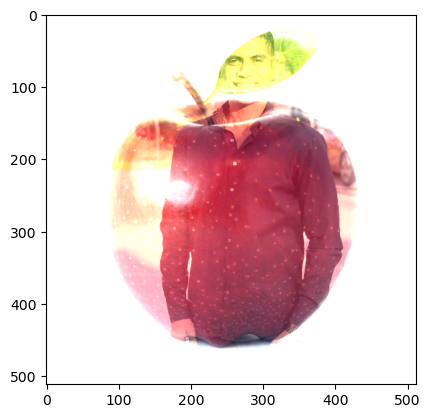

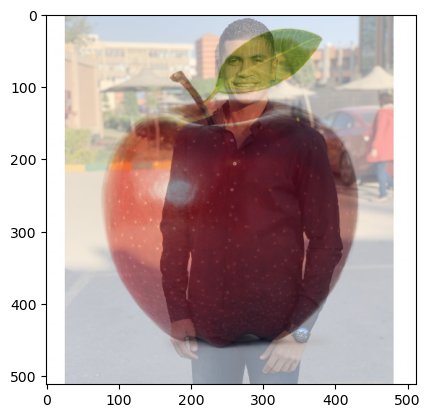

In [74]:
img = cv2.imread('images/my_self.jpg')
img2 = cv2.imread('images/apple1.jpg')


# Resize
img = cv2.resize(img, (512,512))
img2 = cv2.resize(img2, (512,512))
print(img.shape)

# Add --> To add two images (Fusion) they must be same size
fusion = cv2.add(img,img2)
fusion = cv2.cvtColor(fusion, cv2.COLOR_BGR2RGB)
plt.imshow(fusion)
plt.show()


# addWeighted
fusion = cv2.addWeighted(img, 0.5, img2, 0.5, 0)  # Last Param: Brightness
fusion = cv2.cvtColor(fusion, cv2.COLOR_BGR2RGB)
plt.imshow(fusion)
plt.show()

### BitWise (And, Or, Nand, Nor)

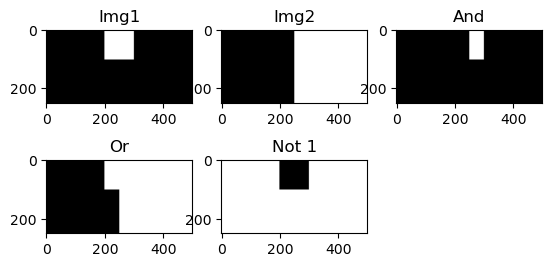

In [88]:
img1 = np.zeros((250,500,3), np.uint8)
img1 = cv2.rectangle(img1, (200,0), (300,100), (255,255,255), -1)
img2 = np.full((250,500,3), 255, dtype=np.uint8)
img2 = cv2.rectangle(img2, (0,0), (250,250), (0,0,0), -1)

bitAnd = cv2.bitwise_and(img1,img2)
bitOr = cv2.bitwise_or(img1,img2)
bitXor = cv2.bitwise_xor(img1,img2)
bitNot = cv2.bitwise_not(img1)         # Inverse



plt.subplot(3,3,1)
plt.title('Img1')
plt.imshow(img1)
plt.subplot(3,3,2)
plt.title('Img2')
plt.imshow(img2)
plt.subplot(3,3,3)
plt.title('And')
plt.imshow(bitAnd)
plt.subplot(3,3,4)
plt.title('Or')
plt.imshow(bitOr)
plt.subplot(3,3,5)
plt.title('Not 1')
plt.imshow(bitNot)
plt.show()


### Inversing an Image

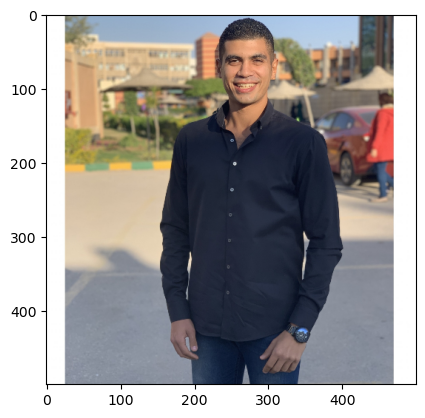

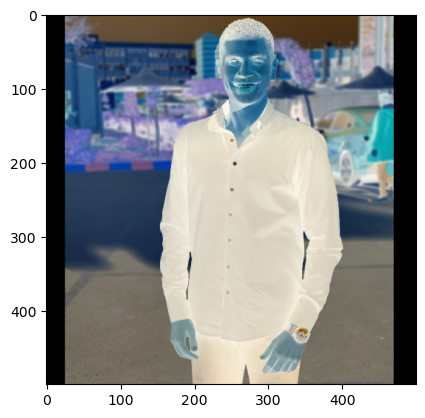

In [89]:
img = cv2.imread('images/my_self.jpg')
img = cv2.resize(img, (500,500))

img_inv = cv2.bitwise_not(img)


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_inv, cv2.COLOR_BGR2RGB))
plt.show()

## TrackBar and Switch Creating

In [4]:
import cv2
import numpy as np

def nothing(x):
    pass
    

# create a black window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')  ## Creating an image window with Named image
                          ## So we can use trackbar

    
# create trackBars
cv2.createTrackbar('B', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('R', 'image', 0, 255, nothing)

# create Switch Button
switch = '0 : OFF \n 1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press q to close !!
        cv2.destroyAllWindows()
        break
        
    b = cv2.getTrackbarPos('B', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    r = cv2.getTrackbarPos('R', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0;
    else:
        img[:] = [b,g,r]
    

cv2.destroyAllWindows()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-u4kjpz2z\opencv\modules\highgui\src\window_w32.cpp:2577: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'
